In [1]:
# This project will require a number of libraries to run multiple tests and visual representations.
# Hence, the need to import the codes below

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import seaborn as sns
from bokeh.plotting import figure
from bokeh.io import show
from bokeh.io import output_notebook
output_notebook()
import seaborn as sb
import matplotlib.pyplot as plt
from scipy import stats
import sys

Loading BokehJS ...

In [6]:
# Creates a dataframe and read the dataset
df=pd.read_csv("wages.csv") 
df.head()

,married,hourly_wage,years_in_education,years_in_employment,num_dependents,gender,race
0,1.0,3.24,12.0,2.0,3.0,female,white
1,0.0,3.00,11.0,0.0,2.0,male,white
2,1.0,6.00,8.0,28.0,0.0,male,white
3,1.0,5.30,12.0,2.0,1.0,male,white
4,1.0,8.75,16.0,8.0,0.0,male,white


In [7]:
# Running a display descriptive to display all the data set to understand the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525 entries, 0 to 524
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   married              522 non-null    float64
 1   hourly_wage          517 non-null    float64
 2   years_in_education   522 non-null    float64
 3   years_in_employment  519 non-null    float64
 4   num_dependents       520 non-null    float64
 5   gender               521 non-null    object 
 6   race                 515 non-null    object 
dtypes: float64(5), object(2)
memory usage: 28.8+ KB


# Question 1
Display the descriptive statistics on the dataset

In [8]:
#Analyses the numeric columns
df.describe().T 

,count,mean,std,min,25%,50%,75%,max
married,522.0,0.609195,0.488399,0.00,0.00,1.00,1.00,1.00
hourly_wage,517.0,5.917737,3.699058,0.53,3.35,4.67,6.88,24.98
years_in_education,522.0,12.557471,2.757219,0.00,12.00,12.00,14.00,18.00
years_in_employment,519.0,5.152216,7.257133,0.00,0.00,2.00,7.00,44.00
num_dependents,520.0,1.044231,1.258484,0.00,0.00,1.00,2.00,6.00


In [9]:
#Displays the descriptive data 
df.describe(include='all')

,married,hourly_wage,years_in_education,years_in_employment,num_dependents,gender,race
count,522.000000,517.000000,522.000000,519.000000,520.000000,521,515
unique,NaN,NaN,NaN,NaN,NaN,2,2
top,NaN,NaN,NaN,NaN,NaN,male,white
freq,NaN,NaN,NaN,NaN,NaN,272,461
mean,0.609195,5.917737,12.557471,5.152216,1.044231,NaN,NaN
std,0.488399,3.699058,2.757219,7.257133,1.258484,NaN,NaN
min,0.000000,0.530000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.000000,3.350000,12.000000,0.000000,0.000000,NaN,NaN
50%,1.000000,4.670000,12.000000,2.000000,1.000000,NaN,NaN
75%,1.000000,6.880000,14.000000,7.000000,2.000000,NaN,NaN


## Question 2
Check for missing values and handle appropriately

In [10]:
# Checks for missing data in dataset
df.isnull().sum()

married                 3
hourly_wage             8
years_in_education      3
years_in_employment     6
num_dependents          5
gender                  4
race                   10
dtype: int64

In [13]:
# Replaces the missing numeric data with the mean.
sorted_df = df
sorted_df['hourly_wage'] = sorted_df['hourly_wage'].fillna(sorted_df.hourly_wage.mean())
sorted_df['years_in_education'] = sorted_df['years_in_education'].fillna(sorted_df.years_in_education.mean())
sorted_df['years_in_employment'] = sorted_df['years_in_employment'].fillna(sorted_df.years_in_employment.mean())
sorted_df['num_dependents'] = sorted_df['num_dependents'].fillna(sorted_df.num_dependents.mean())


In [14]:
print(df.isnull().sum())

married                 3
hourly_wage             0
years_in_education      0
years_in_employment     0
num_dependents          0
gender                  4
race                   10
dtype: int64


In [15]:
# Replaces the missing text.
gender_mode = sorted_df.gender.mode()[0]
sorted_df.gender.fillna(gender_mode, inplace=True)
race_mode = sorted_df.race.mode()[0]
sorted_df.race.fillna(race_mode, inplace=True)

In [17]:
sorted_df.married.fillna(sorted_df.married.mode()[0], inplace=True)

In [18]:
print(df.isnull().sum())

married                0
hourly_wage            0
years_in_education     0
years_in_employment    0
num_dependents         0
gender                 0
race                   0
dtype: int64


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525 entries, 0 to 524
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   married              525 non-null    float64
 1   hourly_wage          525 non-null    float64
 2   years_in_education   525 non-null    float64
 3   years_in_employment  525 non-null    float64
 4   num_dependents       525 non-null    float64
 5   gender               525 non-null    object 
 6   race                 525 non-null    object 
dtypes: float64(5), object(2)
memory usage: 28.8+ KB


In [20]:
#Displays the descriptive data

df.describe(include='all')

,married,hourly_wage,years_in_education,years_in_employment,num_dependents,gender,race
count,525.000000,525.000000,525.000000,525.000000,525.000000,525,525
unique,NaN,NaN,NaN,NaN,NaN,2,2
top,NaN,NaN,NaN,NaN,NaN,male,white
freq,NaN,NaN,NaN,NaN,NaN,276,471
mean,0.611429,5.917737,12.557471,5.152216,1.044231,NaN,NaN
std,0.487890,3.670713,2.749315,7.215465,1.252465,NaN,NaN
min,0.000000,0.530000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.000000,3.350000,12.000000,0.000000,0.000000,NaN,NaN
50%,1.000000,4.720000,12.000000,2.000000,1.000000,NaN,NaN
75%,1.000000,6.880000,14.000000,7.000000,2.000000,NaN,NaN


<AxesSubplot:>

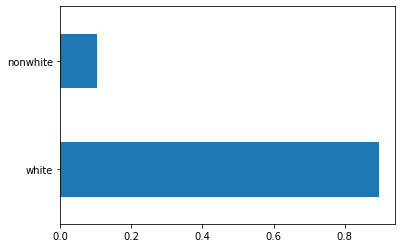

In [21]:
# Displays racial distribution  
sorted_df.race.value_counts(normalize=True).plot.barh()

## Question 3
Build a graph visualizing the distribution between of one or more independent continuous variables.

array([[<AxesSubplot:title={'center':'hourly_wage'}>,
        <AxesSubplot:title={'center':'years_in_education'}>],
       [<AxesSubplot:title={'center':'num_dependents'}>, <AxesSubplot:>]],
      dtype=object)

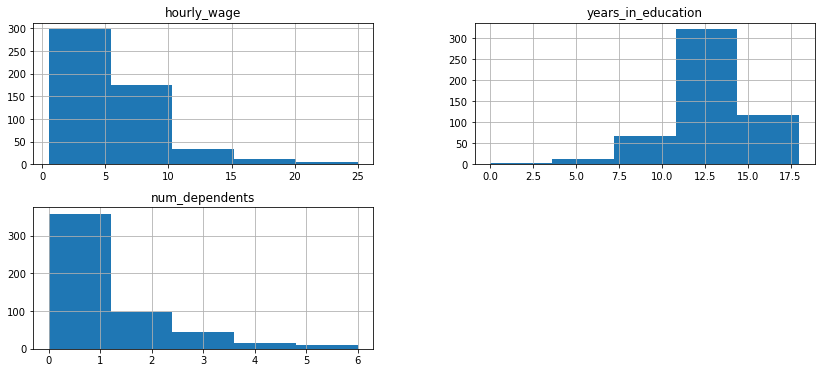

In [23]:
sorted_df.hist(column=['hourly_wage', 'years_in_education', 'num_dependents'], bins=5, figsize=(14,6))

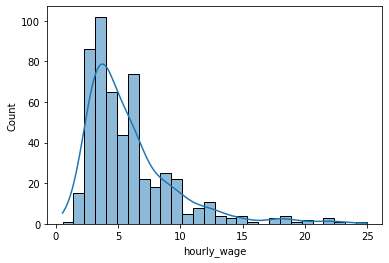

In [24]:
sns.histplot(x='hourly_wage', data=df,kde = True)
plt.show()

## Question 4
Build a graph visualizing the relationship in a pair of continuous variables. Determine the correlation between them.

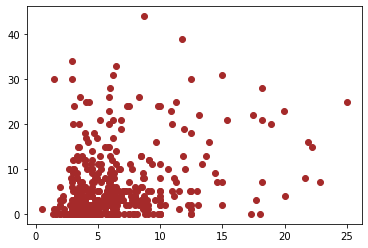

In [34]:
#Creates scatter plot that shows relationship between hourly wages and years of employment
plt.scatter(sorted_df.hourly_wage, sorted_df.years_in_employment, color = 'brown')
plt.show()

In [35]:
#Shows correlation between different datasets
df.corr()

,married,hourly_wage,years_in_education,years_in_employment,num_dependents
married,1.000000,0.232901,0.065053,0.238389,0.146442
hourly_wage,0.232901,1.000000,0.388620,0.340975,-0.047308
years_in_education,0.065053,0.388620,1.000000,-0.063015,-0.218630
years_in_employment,0.238389,0.340975,-0.063015,1.000000,-0.017051
num_dependents,0.146442,-0.047308,-0.218630,-0.017051,1.000000


In [36]:
#Selects the correlation between years in employment and hourly wage
sorted_df['years_in_employment'].corr(sorted_df['hourly_wage'], method='pearson')

0.34097528485222733

## QUESTION 5 
Display unique values of a categorical variable.

In [37]:
#Counts every value for gender
sorted_df['gender'].value_counts()

male      276
female    249
Name: gender, dtype: int64

<AxesSubplot:ylabel='gender'>

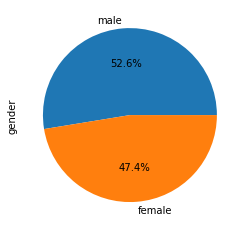

In [39]:
#Plots pie chart
df.gender.value_counts().plot.pie(autopct='%1.1f%%')

In [38]:
#Counts every value for race
sorted_df["race"]. value_counts()

white       471
nonwhite     54
Name: race, dtype: int64

<AxesSubplot:ylabel='race'>

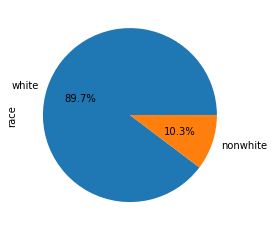

In [40]:
#Plots pie chart
df.race.value_counts().plot.pie(autopct='%1.1f%%')

In [41]:
#Counts every value for marraige
sorted_df["married"].value_counts()

1.0    321
0.0    204
Name: married, dtype: int64

<AxesSubplot:ylabel='married'>

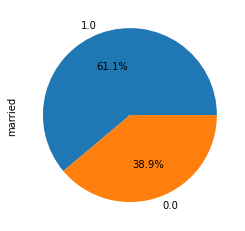

In [42]:
#Plots pie chart
df.married.value_counts().plot.pie(autopct='%1.1f%%')

## QUESTION 6
Build a contingency table of two potentially related categorical variables. Conduct a statistical test of the independence between them

In [43]:
#Creates and displays a contingency table
contingency_table = pd.crosstab(sorted_df['race'], sorted_df['gender'])
contingency_table

gender,female,male
race,,
nonwhite,25,29
white,224,247


<AxesSubplot:xlabel='race'>

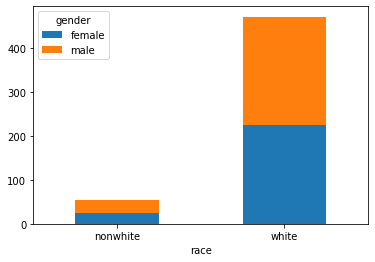

In [44]:
#Plots bar chart
contingency_table.plot(kind='bar', stacked=True, rot=0)

In [45]:
#The Chi Square test is an appropriate test of independence 
chi2,p_val,dof,expected = stats.chi2_contingency(contingency_table)
print('P value is:', p_val)

P value is: 0.9744235870731893


The p-value of the Chi Squared test on race and gender was 0.9744235870731893. 
This is significantly lower than  significance level of 0.05 so we would  we reject the null hypothesis that there is no dependence between the race and gender.

Hence we would conclude that we found no evidence that the gender of individuals is dependent on race. 

## QUESTION 7
Retrieve one or more subset of rows based on two or more criteria and present descriptive statistics on the subset(s).

In [54]:
# Criteria chosen is to find individuals with less than 4 years in employment that earn more than $12 hourly wage
#Displays a subset based on a defined a criteria. 

subset = sorted_df[(sorted_df.years_in_employment < 4) & (sorted_df.hourly_wage > 12)]
subset

,married,hourly_wage,years_in_education,years_in_employment,num_dependents,gender,race
14,1.0,17.33,16.0,0.0,1.0,male,white
26,1.0,12.50,16.0,0.0,0.0,male,white
27,1.0,12.50,15.0,0.0,2.0,male,white
70,1.0,13.08,17.0,2.0,3.0,male,nonwhite
170,0.0,12.50,12.0,1.0,0.0,male,white
258,0.0,18.00,18.0,0.0,0.0,female,white
337,0.0,12.22,16.0,2.0,0.0,male,white
350,0.0,12.50,18.0,2.0,0.0,male,white
503,1.0,17.71,16.0,3.0,1.0,male,white
520,1.0,15.00,16.0,2.0,2.0,female,white


There are 10 people in the data set with less than 4 years in employment that earn more than $12 hourly wage

In [53]:
#Displays the descriptive data
subset.describe()

,married,hourly_wage,years_in_education,years_in_employment,num_dependents
count,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.600000,14.334000,16.000000,1.200000,0.900000
std,0.516398,2.443864,1.699673,1.135292,1.100505
min,0.000000,12.220000,12.000000,0.000000,0.000000
25%,0.000000,12.500000,16.000000,0.000000,0.000000
50%,1.000000,12.790000,16.000000,1.500000,0.500000
75%,1.000000,16.747500,16.750000,2.000000,1.750000
max,1.000000,18.000000,18.000000,3.000000,3.000000


male      8
female    2
Name: gender, dtype: int64


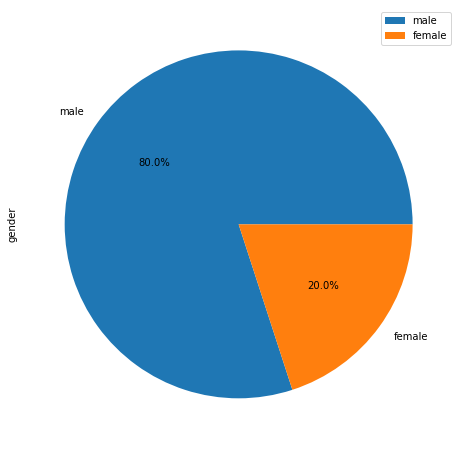

In [56]:
gender_count = subset['gender'].value_counts()
gender_df = pd.DataFrame({'gender': gender_count}, 
                        index = ['male', 'female'])
gender_df.plot.pie(y='gender', figsize=(8,8), autopct='%1.1f%%')
print(gender_count)

white       9
nonwhite    1
Name: race, dtype: int64


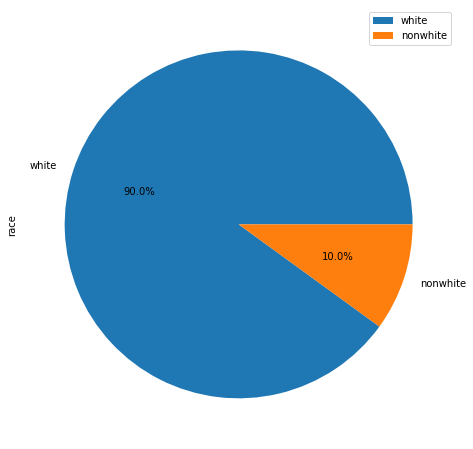

In [57]:
race_count = subset['race'].value_counts()
race_df = pd.DataFrame({'race': race_count}, 
                        index = ['white', 'nonwhite'])
race_df.plot.pie(y='race', figsize=(8,8), autopct='%1.1f%%')
print(race_count)

The subset of data shows that of the ten individuals with less than 4 years in employment that earn more than $12 hourly wage, the gender and race disparity was significant. Men we

## QUESTION 8
Conduct a statistical test of the significance of the difference between the means of two subsets of the data.

In [62]:
import researchpy as rp

In [65]:
#Checks for the statistical difference in the average hourly wage of th two gender 
summary, results = rp.ttest(group1= sorted_df["hourly_wage"][sorted_df['gender']=='male'],group1_name ="male",
        group2= sorted_df['hourly_wage'][sorted_df['gender']=='female'], group2_name ="female")
print(summary)

   Variable      N      Mean        SD        SE  95% Conf.  Interval
0      male  276.0  7.071904  4.152448  0.249948   6.579849  7.563958
1    female  249.0  4.638419  2.494738  0.158098   4.327034  4.949804
2  combined  525.0  5.917737  3.670713  0.160203   5.603018  6.232456


The results show that the hourly wage of females on an average is more 30% lower than that of their male counterparts, whcih indicates that the female portion of wages which are on the lower band bring down the combined mean all together.

In [66]:
print(results)

              Independent t-test   results
0  Difference (male - female) =     2.4335
1          Degrees of freedom =   523.0000
2                           t =     8.0314
3       Two side test p value =     0.0000
4      Difference < 0 p value =     1.0000
5      Difference > 0 p value =     0.0000
6                   Cohen's d =     0.7020
7                   Hedge's g =     0.7010
8               Glass's delta =     0.5860
9                 Pearson's r =     0.3314


With a 95% confidence interval, the p-value of 0.0000 shows that there is a high signifiance and we reject the null hypothesis.
This means that there is stattistical difference betweem the hourly wages of male and female individuals

The correlation also sits at 0.3314 which shows a moderate correlation in gender and hourly wage

Degrees of freedom is 525-1-1 = 523

## Question 9
Create one or more tables that group the data by a certain categorical variable and displays summarized information for each group (e.g. the mean or sum within the group).

In [67]:
group_gender = sorted_df.groupby("gender")
group_gender.size()

gender
female    249
male      276
dtype: int64

In [68]:
show_grpdata = group_gender.agg({"years_in_education":["count","min","max","mean","median","skew"],
                  "years_in_employment":["count","min","max","mean","median","skew"],
                     "hourly_wage":["count","min","max","mean","median","skew"],
                     "num_dependents":["count","min","max","mean","median","skew"]
                    })
show_grpdata

years_in_education                                         \
                    count  min   max       mean median      skew   
gender                                                             
female                249  0.0  18.0  12.321285   12.0 -0.884855   
male                  276  2.0  18.0  12.770552   12.0 -0.574011   

       years_in_employment                       ... hourly_wage            \
                     count  min   max      mean  ...         max      mean   
gender                                           ...                         
female                 249  0.0  34.0  3.725948  ...       21.63  4.638419   
male                   276  0.0  44.0  6.438957  ...       24.98  7.071904   

                        num_dependents                                       
       median      skew          count  min  max      mean median      skew  
gender                                                                       
female   3.81  2.849898            249  0.0  5.0  1.064790    1.0  1.057203  
male     6.00  1.599322            276  0.0  6.0  1.025683    0.0  1.258452  

[2 rows x 24 columns]

## Question 10
Implement a linear regression model and interpret its output

In [69]:
from sklearn.preprocessing import LabelEncoder
number = LabelEncoder()
sorted_df['gender'] = number.fit_transform(sorted_df['gender'].astype('object'))
sorted_df['race'] = number.fit_transform(sorted_df['race'].astype('object'))
sorted_df['married'] = number.fit_transform(sorted_df['married'].astype('float'))
sorted_df.head()

,married,hourly_wage,years_in_education,years_in_employment,num_dependents,gender,race
0,1,3.24,12.0,2.0,3.0,0,1
1,0,3.00,11.0,0.0,2.0,1,1
2,1,6.00,8.0,28.0,0.0,1,1
3,1,5.30,12.0,2.0,1.0,1,1
4,1,8.75,16.0,8.0,0.0,1,1


In [72]:
lr_model = sm.OLS.from_formula(
    "hourly_wage ~  years_in_education + years_in_employment + gender", data = sorted_df).fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            hourly_wage   R-squared:                       0.340
Model:                            OLS   Adj. R-squared:                  0.336
Method:                 Least Squares   F-statistic:                     89.41
Date:                Fri, 17 Dec 2021   Prob (F-statistic):           1.10e-46
Time:                        05:37:23   Log-Likelihood:                -1318.1
No. Observations:                 525   AIC:                             2644.
Df Residuals:                     521   BIC:                             2661.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -2.3729      0.628     -3.777      0.000      -3.607      -1.139
years_in_education      0.5197      0.048     10.864      0.000       0.426       0.614
years_in_employment     0.1631      0.018      8.816      0.000       0.127       0.199
gender                  1.7576      0.267      6.573      0.000       1.232       2.283
==============================================================================
Omnibus:                      202.430   Durbin-Watson:                   1.812
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              853.819
Skew:                           1.713   Prob(JB):                    3.94e-186
Kurtosis:                       8.224   Cond. No.                         68.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**(1) Coefficients on the variables.** Our model is described by:

**Hourlywage = -2.3729 + 0.5197 * (years_in_education) + 0.1631 * (years_in_employment) + 1.7576 * (gender)**

This shows that the most important variables by order of importance are Gender, Years in education and Years in employment. 

**(2) Significance of the variables**:- In the table, we see that the p values of years in education, years in employment, and gender all have a value to be  of p = 0.000 which is significant, these factors have a significant effect on the dependent variable which is the hourly wage.

**(3) Quality of the model**:- The R-squared of 0.34 and the adjusted R-spuared 0.336 values are
shown in the first table. Both are around 0.3 (30%), which shows a lack of accuracy in the predictive abilities of the model with the level of information provided.

